In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.0 EDA

## Data preparation

In [81]:
df = pd.read_csv('../lab/data/cardio_train.csv', index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# no missing values
df.info()

In [82]:
# age recalculated from days to years
df['age'] = df['age']/365

In [83]:
# change ome col names
df = df.rename(columns={'ap_hi': 'systolic_high', 'ap_lo': 'diastolic_low', 'gluc': 'glucose', 'alco': 'alcohol', 'cardio': 'cardio_disease'})

In [84]:
# check values in columns containing cathegorical values
df["gender"].value_counts(), df["cholesterol"].value_counts(), df[
    "glucose"
].value_counts(), df["smoke"].value_counts(), df["alcohol"].value_counts(), df[
    "active"
].value_counts(), df[
    "cardio_disease"
].value_counts()

#-----------------------------------------------------------------------------------
# all seem ok

(1    45530
 2    24470
 Name: gender, dtype: int64,
 1    52385
 2     9549
 3     8066
 Name: cholesterol, dtype: int64,
 1    59479
 3     5331
 2     5190
 Name: glucose, dtype: int64,
 0    63831
 1     6169
 Name: smoke, dtype: int64,
 0    66236
 1     3764
 Name: alcohol, dtype: int64,
 1    56261
 0    13739
 Name: active, dtype: int64,
 0    35021
 1    34979
 Name: cardio_disease, dtype: int64)

In [85]:
# check reasonalbility of columns containing non-cathegorical values
df.describe()

#-----------------------------------------------------------------------------------------
# age - reasonable
# hight - very low and very high values present (most humans can be assumed to be between 145-200 cm)
# weight - too low values present (consideing min age is 26 years, reasonable with margins 30 and above)
# systolic_high - too low and too high values present (reasonable with margins between 50 - 250)
# diastolic_low - too low and too high values present (reasonable with margins between 20 - 180)

,age,gender,height,weight,systolic_high,diastolic_low,cholesterol,glucose,smoke,alcohol,active,cardio_disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


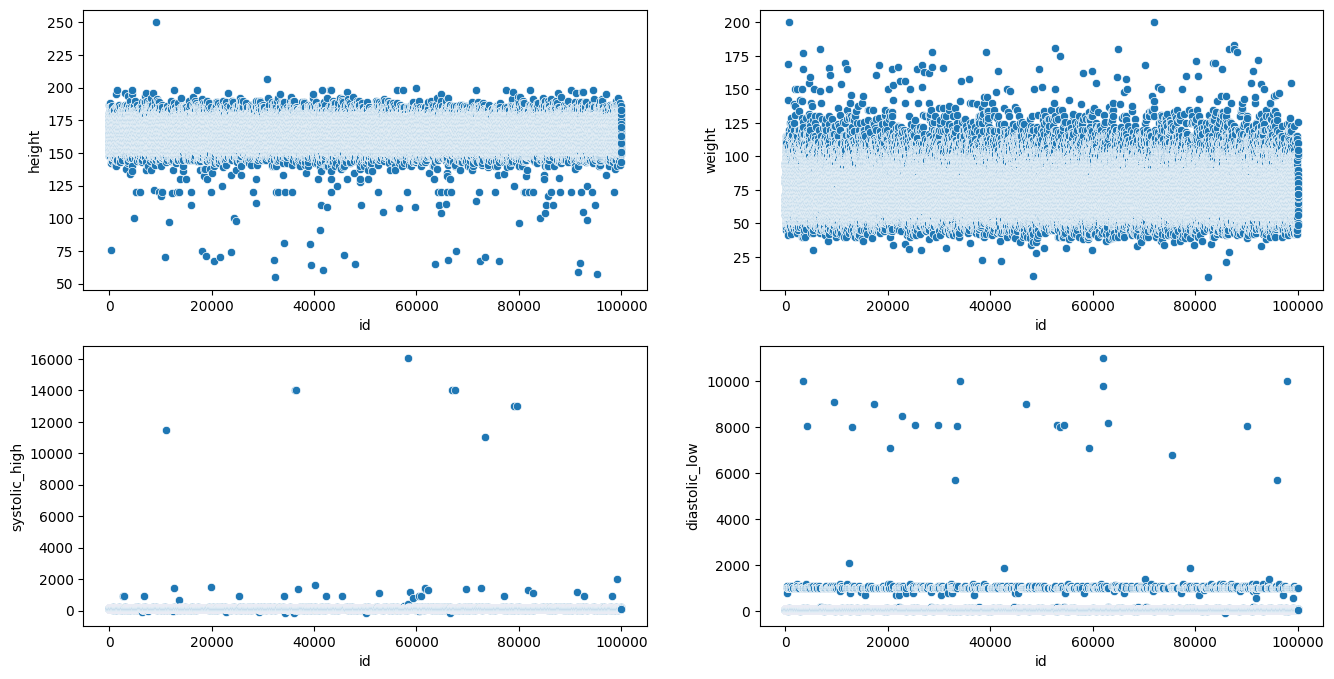

In [86]:
# visualizing all data
fig, axes = plt.subplots(2,2, figsize = (16,8))
y_cols = ['height', 'weight', 'systolic_high', 'diastolic_low']

# axes.faltten creates a list-like object ([axes[0][0], axes[0][1], axes[1][0], axes[1][1]], ....)
for ax, y_col in zip(axes.flatten(), y_cols):
    sns.scatterplot(data=df, x=df.index, y= y_col, ax = ax)

Height:
* values below 100 are suspected to be typos where 100-s was missed. can not be sure, thus remove those datapoints
* most humas should be between 145-200 cm thus remove datapoints which are not between 125-220 cm

Weight:
* values below 30 are removed

Systolic_high:
* keep values 50-250

Diastolic_low
* keep values 20-180

In [94]:
# removing rows with datapoints which are not physically feasable
df = df.query(
    "height >= 125 & height <= 220 & weight >= 30 & systolic_high <= 250 & systolic_high >= 50 & diastolic_low <= 180 & diastolic_low >= 20"
)

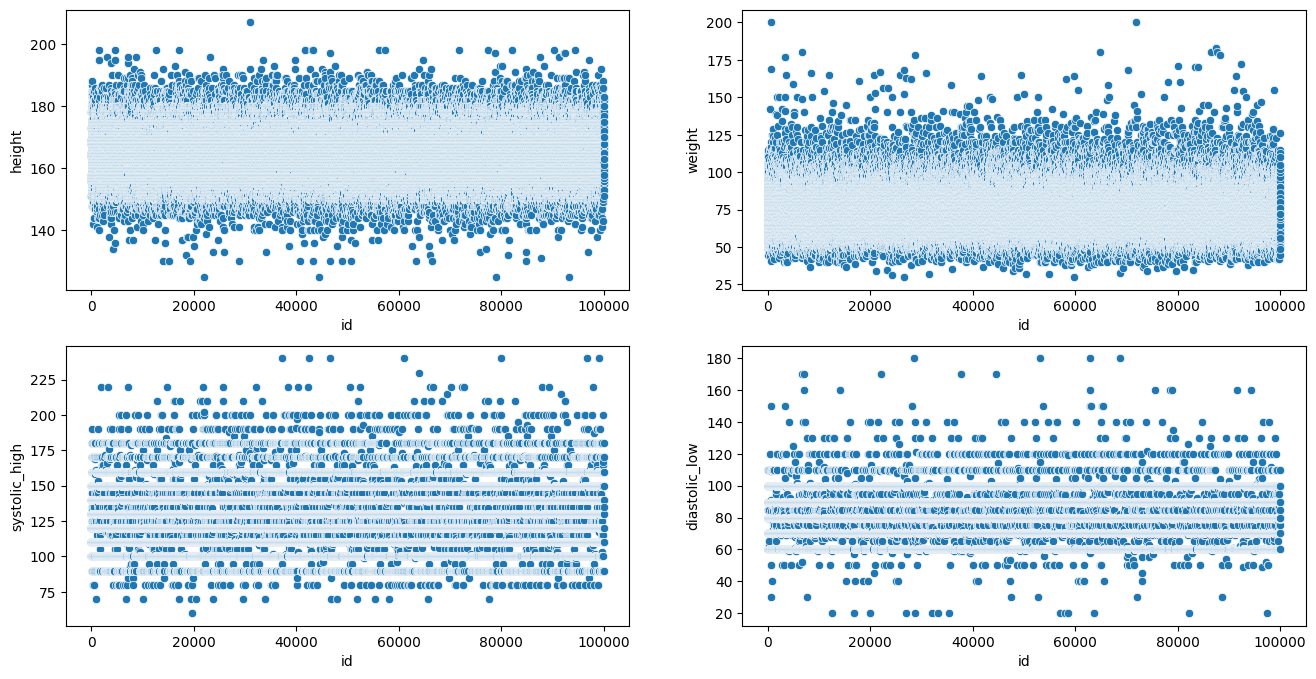

In [95]:
# visualizing cleaned data

fig, axes = plt.subplots(2,2, figsize = (16,8))
y_cols = ['height', 'weight', 'systolic_high', 'diastolic_low']

# axes.faltten creates a list-like object ([axes[0][0], axes[0][1], axes[1][0], axes[1][1]], ....)
for ax, y_col in zip(axes.flatten(), y_cols):
    sns.scatterplot(data=df, x=df.index, y= y_col, ax = ax)

In [ ]:
df.info()

#-------------------------------------
# while cleaning data 1298 points were removed

### a) How many are positive and how many are negative for cardio-vascular disease?